# Bäume einfach visualisieren
Den folgenden Code können Sie zur Visualisierung von Binärbäumen, binären Suchbäumen und allgemeinen Bäumen (d.h. mit beliebig vielen Kindern) nutzen. Sie können die Baumstrukturen insb. in einem einfachen Textformat mit Einrückungen beschreiben 

In [31]:
# Wir brauchen Graphviz und die Python-Bibliothek dazu.
# Falls noch nicht installiert, hier die Befehle (für Anaconda):

# !conda install -y graphviz python-graphviz

In [32]:
# Wichtige Imports
from __future__ import annotations

from graphviz import Digraph    # graphviz muss installiert sein
from IPython.display import display

import random

def random_id():
    return random.randint(0, 1000000)

## Binärbaum

Wir erstellen eine ganz einfache Klasse für Binärbaum. Sie dient hier nur dazu, 
schöne Visualisierungen zu erzeugen.

In [33]:
class BKnoten:
    """Rudimentäre Klasse für Binärbaum-Knoten, dient nur dazu, schöne Visualisierungen zu erzeugen."""
    def __init__(self, inhalt):
        self.inhalt = inhalt
        self.linker_teilbaum = None
        self.rechter_teilbaum = None

    def label(self):
        """Gibt eine Beschriftung für den Knoten zurück."""
        return str(self.inhalt)
    
    def sammle_knoten(self):  # Hilfsfunktion v.a. für die Visualisierung
        """Rekursive Hilfsmethode, die alle Knoten des Baumes sammelt."""
        links, rechts = [], []
        if self.linker_teilbaum != None:
            links = self.linker_teilbaum.sammle_knoten()  # Rekursiver Aufruf
        if self.rechter_teilbaum != None:
            rechts = self.rechter_teilbaum.sammle_knoten()  # Rekursiver Aufruf
        return [self] + links + rechts
    
    def daten_inorder(self) -> list:
        """Gibt die Daten des Baums in Inorder-Reihenfolge zurück."""
        links, rechts = [], []
        if self.linker_teilbaum != None:
            links = self.linker_teilbaum.daten_inorder()
        if self.rechter_teilbaum != None:
            rechts = self.rechter_teilbaum.daten_inorder()
        return links + [self.inhalt] + rechts
    
    def daten_preorder(self) -> list:
        """Gibt die Daten des Baums in Preorder-Reihenfolge zurück."""
        links, rechts = [], []
        if self.linker_teilbaum != None:
            links = self.linker_teilbaum.daten_preorder()
        if self.rechter_teilbaum != None:
            rechts = self.rechter_teilbaum.daten_preorder()
        return [self.inhalt] + links + rechts
    
    def daten_postorder(self) -> list:
        """Gibt die Daten des Baums in Postorder-Reihenfolge zurück."""
        links, rechts = [], []
        if self.linker_teilbaum != None:
            links = self.linker_teilbaum.daten_postorder()
        if self.rechter_teilbaum != None:
            rechts = self.rechter_teilbaum.daten_postorder()
        return links + rechts + [self.inhalt]
    
    def print_preorder(self):
        """Gibt die Daten des Baums in Preorder-Reihenfolge aus."""
        print(self.inhalt)
        if self.linker_teilbaum != None:
            self.linker_teilbaum.print_preorder()
        if self.rechter_teilbaum != None:
            self.rechter_teilbaum.print_preorder()
    
    

class Binärbaum:
    """Rudimentäre Binärbaum-Klasse, dient nur dazu, schöne Visualisierungen zu erzeugen."""
    def __init__(self, wurzel: BKnoten = None):
        self.wurzel: BKnoten|None = wurzel

    def knoten_und_kanten(self):  # Hilfsfunktion für die Visualisierung
        if self.wurzel == None:
            return [], []
        knoten: list[BKnoten] = self.wurzel.sammle_knoten()  # Hier passiert gleich die eigentliche Arbeit!
        kanten = []
        for k in knoten:
            for kind in (k.linker_teilbaum, k.rechter_teilbaum):
                if kind != None:
                    kanten.append((k, kind))
        return knoten, kanten

    def daten_inorder(self) -> list:
        """Gibt die Daten des Baums in Inorder-Reihenfolge zurück."""
        if self.wurzel == None:
            return []
        return self.wurzel.daten_inorder()
        
    def daten_preorder(self) -> list:
        """Gibt die Daten des Baums in Preorder-Reihenfolge zurück."""
        if self.wurzel == None:
            return []
        return self.wurzel.daten_preorder()
    
    def daten_postorder(self) -> list:
        """Gibt die Daten des Baums in Postorder-Reihenfolge zurück."""
        if self.wurzel == None:
            return []
        return self.wurzel.daten_postorder()
    
    def to_dot(self, graph_attrs={}, node_attrs={}, edge_attrs={}) -> Digraph:
        """Erzeugt ein Dot-Objekt für die Visualisierung des Binärbaums."""

        # Standardwerte für die Graphviz-Attribute festlegen, falls nicht übergeben
        # Diese Werte dienen als Beispiel und können natürlich angepasst werden
        graph_attrs_default = dict(nodesep="0.4", ranksep="0.3", splines="line", bgcolor="white")
        node_attrs_default = dict(ordering="out",
                            shape="circle", fontname="Helvetica",
                            style="filled", fillcolor="lightblue",
                            # fixedsize="true", width="0.35", fontsize="12", 
                            )
        edge_attrs_default = dict(arrowsize="0.5")

        # Die übergebenen Attribute mit den Standardattributen kombinieren
        g_attrs = graph_attrs_default | graph_attrs
        e_attrs = edge_attrs_default | edge_attrs
        n_attrs = node_attrs_default | node_attrs

        knoten, kanten = self.knoten_und_kanten()  
        dot = Digraph(format='svg', graph_attr=g_attrs, node_attr=n_attrs, edge_attr=e_attrs)

        for k in knoten:
            dot.node(name=str(id(k)), label=k.label())
            kl, kr = k.linker_teilbaum, k.rechter_teilbaum

            if kl is None and kr is None:
                continue  # Keine Kinder, also keine Kanten zeichnen

            if kl != None:  # Wenn es ein linkes Kind gibt, dann zeichne es
                dot.node(name=str(id(kl)), label=kl.label())
                dot.edge(str(id(k)), str(id(kl)))
            else:  # Sonst füge einen unsichtbaren Knoten ein
                invisible_node = str(random_id())  # irgendein Label
                dot.node(name=invisible_node, label="", style="invis")
                dot.edge(str(id(k)), invisible_node, style="invis")

            # unsichtbaren Knoten zwischen den beiden Kindern einfügen, um symmetrische Anordnung zu erzeugen
            invisible_node = str(random_id())  # irgendein Label
            dot.node(name=invisible_node, label="", style="invis", width="0.01")
            edge_weight = 10
            dot.edge(str(id(k)), invisible_node, weight=str(edge_weight), style="invis")

            if kr != None:  # Wenn es ein rechtes Kind gibt, dann zeichne es
                dot.node(name=str(id(kr)), label=kr.label())
                dot.edge(str(id(k)), str(id(kr)))
            else:  # Sonst füge einen unsichtbaren Knoten ein
                invisible_node = str(random_id())
                dot.node(name=invisible_node, label="", style="invis")
                dot.edge(str(id(k)), invisible_node, style="invis")

        return dot


## Binärer Suchbaum
Hier wird automatisch nach der Regel für binäre Suchbäume eingefügt.

In [34]:
class BinSuchKnoten(BKnoten):
    """Knoten für einen binären Suchbaum. Dient hier nur dazu, schnell eine Visualisierung zu erzeugen."""
    def __init__(self, inhalt):
        super().__init__(inhalt)

    def einfuegen(self, wert):
        """Fügt einen neuen Wert in den Baum ein."""
        if wert < self.inhalt:
            if self.linker_teilbaum == None:
                self.linker_teilbaum = BinSuchKnoten(wert)
            else:
                self.linker_teilbaum.einfuegen(wert)
        else:
            if self.rechter_teilbaum == None:
                self.rechter_teilbaum = BinSuchKnoten(wert)
            else:
                self.rechter_teilbaum.einfuegen(wert)

    def enthält(self, wert):
        """Prüft, ob ein Wert im Baum enthalten ist."""
        if wert == self.inhalt:
            return True
        elif wert < self.inhalt:
            if self.linker_teilbaum != None:
                return self.linker_teilbaum.enthält(wert)  # Suche im linken Teilbaum
            else:
                return False  # Wert müsste im linken Teilbaum sein, aber der existiert nicht
        else:
            if self.rechter_teilbaum != None:
                return self.rechter_teilbaum.enthält(wert) # Suche im rechten Teilbaum
            else:
                return False

class BinärerSuchbaum(Binärbaum):
    def __init__(self):
        self.wurzel: BinSuchKnoten|None = None

    def einfuegen(self, wert):
        """Fügt einen neuen Wert in den Baum ein."""
        if self.wurzel == None:
            self.wurzel = BinSuchKnoten(wert)
        else:
            self.wurzel.einfuegen(wert)

    def enthält(self, wert):
        """Prüft, ob ein Wert im Baum enthalten ist."""
        if self.wurzel == None:
            return False
        else:
            return self.wurzel.enthält(wert)
        
       
   

## Binärbaum visualisieren

In [35]:
def graph_anzeigen(some_graph, output_file=None, **kwargs) -> None:
    # Wenn some_graph eine Methode to_dot hat, rufe sie auf
    if hasattr(some_graph, "to_dot"):
        dot = some_graph.to_dot(**kwargs)
    else:  # Ansonsten gehe davon aus, dass some_graph schon ein Dot-Objekt ist
        dot = some_graph 
    if output_file:
        dot.render(output_file, view=False, cleanup=True)
    display(dot)

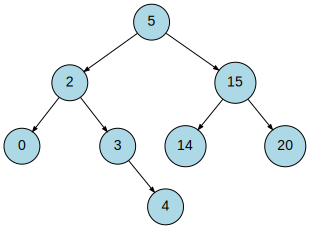

In [36]:
# Beispiel für die Visualisierung eines Binärbaums
# Hier nutzen wir einen Binären Suchbaum, weil der so einfach zu erstellen ist

# knoten = [11, 5, 2, 0, 3, 4, 15, 14, 20]    
knoten = [5, 2, 0, 3, 4, 15, 14, 20]    


baum = BinärerSuchbaum()
for k in knoten:
    baum.einfuegen(k)

graph_anzeigen(baum, output_file="images/baum1")


## Eingerückter Multiline-String zu Binärbaum
Für Beispiele im Unterricht müssen wir oft schnell Bäume erstellen. Dazu wollen wir sie
in einem einfachen Textformat eingeben können. Hier ein paar Beispiele:

In [37]:
# Beispiele für Binärbäume, die als eingerückte Multiline-Strings dargestellt sind

bin_baum_str1: str = """
Tier
 Säugetier
  Hund
    Collie
    Dackel
  Affe
    Schimpanse
    Gorilla
 Fisch
  Süßwasserfisch
   Forelle
   Goldfisch
  Salzwasserfisch
   Thunfisch
   Hai
"""


bin_baum_str2: str = """
Säugetier
  Hund
    Collie
      Lassie
      Lassie Junior
    -
  Affe
    -
    Gorilla
      King Kong
      -
"""


Aus einem solchen String erzeugen wir mit der folgenden Funktion einen Baum:

In [38]:
def binärbaum_aus_str(s: str) -> Binärbaum:
    if s == "":
        return Binärbaum()
    baum = Binärbaum()
    zeilen = s.strip().split("\n")
    wurzel = None
    stack = []
    # Idee: Der Stack enthält immer den aktuellen Elternknoten sowie dessen Einrückungstiefe
    for zeile in zeilen:
        inhalt = zeile.strip()
        einrückung = len(zeile) - len(zeile.lstrip())
        if inhalt == "" or inhalt == "-":
            k = None
        else:
            k = BKnoten(inhalt)
        if wurzel == None:
            wurzel = k
            stack.append((k, einrückung))
        else:
            top, einrückung_top = stack[-1]
            if einrückung > einrückung_top:
                top.linker_teilbaum = k
                stack.append((k, einrückung))
            else:
                while stack and einrückung <= stack[-1][1]:
                    stack.pop()
                if stack:
                    stack[-1][0].rechter_teilbaum = k
                    stack.append((k, einrückung))
    baum.wurzel = wurzel
    return baum


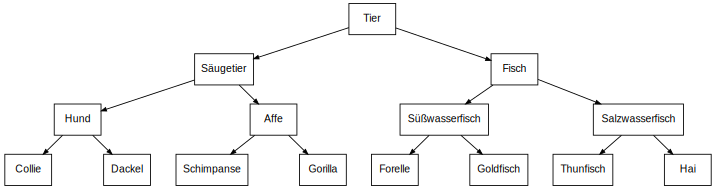

In [39]:

bin_baum_tiere = binärbaum_aus_str(bin_baum_str1)
# bin_baum_tiere.wurzel = binknoten_aus_str(bin_baum_str2)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10"),
    node_attrs=dict(shape="rectangle", style="filled", fillcolor="white", fontname="Helvetica", fontsize="12"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(bin_baum_tiere, output_file="images/baum2", **attrs)

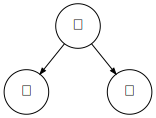

In [40]:
# Es geht auch mit Emojis 😉

baum3knoten: str = """
🍒
  🍋
  🔔
"""


binbaum3knoten = binärbaum_aus_str(baum3knoten)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10"),
    node_attrs=dict(shape="circle", style="filled", fillcolor="white", fontname="Helvetica", fontsize="15"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(binbaum3knoten, output_file="images/baum3einarmiger_bandit", **attrs)

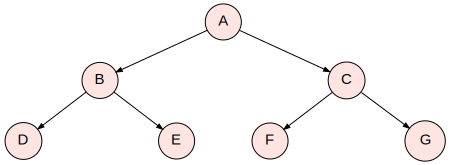

In [41]:
baum7knoten: str = """
A
  B
    D
    E
  C
    F
    G
"""


binbaum7knoten = binärbaum_aus_str(baum7knoten)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10", nodesep="0.8", ranksep="0.3"),
    node_attrs=dict(shape="circle", style="filled", fillcolor="mistyrose", fontname="Helvetica", fontsize="15"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(binbaum7knoten, output_file="images/baum7buchstaben", **attrs)

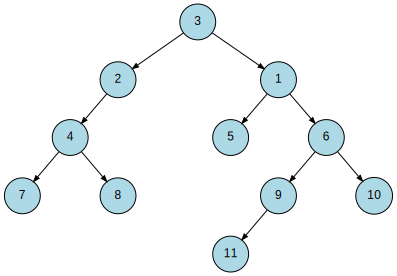

In [42]:
binärbaum_zahlen_str: str = """
3
  2
    4
      7
      8
  1
    5
    6
      9
        11
        -
      10

"""

bin_baum_zahlen = binärbaum_aus_str(binärbaum_zahlen_str)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10"),
    node_attrs=dict(shape="circle", style="filled", fillcolor="lightblue", fontname="Helvetica", fontsize="12"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(bin_baum_zahlen, output_file="images/aufgabe_binbaum_zahlen", **attrs)

## Preorder, Inorder, Postorder

In [43]:
def pretty(liste: list) -> str:
    return ", ".join(map(str, liste))


print(f"- Preorder: {pretty(bin_baum_zahlen.daten_preorder())}")
print(f"- Postorder: {pretty(bin_baum_zahlen.daten_postorder())}")
print(f"- Inorder:  {pretty(bin_baum_zahlen.daten_inorder())}")


- Preorder: 3, 2, 4, 7, 8, 1, 5, 6, 9, 11, 10
- Postorder: 7, 8, 4, 2, 5, 11, 9, 10, 6, 1, 3
- Inorder:  7, 4, 8, 2, 3, 5, 1, 11, 9, 6, 10


In [44]:
antwort = "2, 4, 7, 8, 1, 3, 5, 6, 9, 11, 10"  # Beispiel für eine falsche Antwort
antwort_liste = antwort.replace(",", " ").split()

lösung = bin_baum_zahlen.daten_preorder()

if antwort_liste == lösung:
    print("Richtig!")
else:
    print(f"Deine Lösung ist leider falsch!")
    print(f"Deine Lösung:    {pretty(antwort_liste)}")
    print(f"Korrekte Lösung: {pretty(lösung)}")




Deine Lösung ist leider falsch!
Deine Lösung:    2, 4, 7, 8, 1, 3, 5, 6, 9, 11, 10
Korrekte Lösung: 3, 2, 4, 7, 8, 1, 5, 6, 9, 11, 10


## Zufällige Bäume erzeugen
Für den Anfang machen wir es uns einfach und erzeugen nur zufällige *Such*bäume:

Initalisiere Zufallsgenerator mit seed = 11


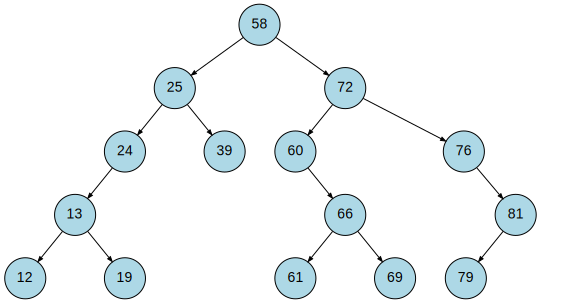

- Preorder: 58, 25, 24, 13, 12, 19, 39, 72, 60, 66, 61, 69, 76, 81, 79
- Postorder: 12, 19, 13, 24, 39, 25, 61, 69, 66, 60, 79, 81, 76, 72, 58
- Inorder:  12, 13, 19, 24, 25, 39, 58, 60, 61, 66, 69, 72, 76, 79, 81


In [45]:
# Wenn Sie die Zufallszahlen reproduzierbar machen wollen, setzen Sie hier einen seed-Wert.
# Falls Sie bei jedem Aufruf dieser Zelle unterschiedliche Zufallszahlen haben wollen, setzen Sie seed auf None.
seed = 11  # None, wenn Sie unterschiedliche Zufallszahlen wollen
if seed is None:
    seed = random.randint(0, 1000000)
print("Initalisiere Zufallsgenerator mit seed =", seed)  # Damit Sie den seed-Wert sehen können
random.seed(seed)

# Wir erzeugen 15 unterschiedliche Zufallszahlen
zahlen = random.sample(range(1, 100), 15)
# und fügen sie in einen binären Suchbaum ein
baum = BinärerSuchbaum()
for z in zahlen:
    baum.einfuegen(z)

# Wir erzeugen eine Visualisierung des Baums
graph_anzeigen(baum, output_file="images/aufgabe_binbaum_suchbaum")

print(f"- Preorder: {pretty(baum.daten_preorder())}")
print(f"- Postorder: {pretty(baum.daten_postorder())}")
print(f"- Inorder:  {pretty(baum.daten_inorder())}")


## Easter Egg: Botschaften im Baum verstecken

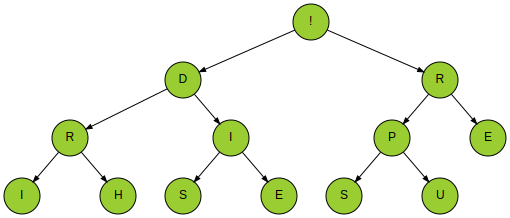

- Preorder: !, D, R, I, H, I, S, E, R, P, S, U, E
- Postorder: I, H, R, S, E, I, D, S, U, P, E, R, !
- Inorder:  I, R, H, D, S, I, E, !, S, P, U, R, E


In [46]:
# Easter egg: In Postorder-Reihenfolge ergibt dieser Baum den Text "IHRSEIDSUPER!"

text_als_baum_postorder_lesbar = """
!
  D
    R
      I
      H
    I
      S
      E
  R
    P
      S
      U
    E
  
"""

bin_baum_text = binärbaum_aus_str(text_als_baum_postorder_lesbar)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10"),
    node_attrs=dict(shape="circle", style="filled", fillcolor="olivedrab3", fontname="Helvetica", fontsize="12"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(bin_baum_text, "images/aufgabe_binbaum_text", **attrs)

print(f"- Preorder: {pretty(bin_baum_text.daten_preorder())}")
print(f"- Postorder: {pretty(bin_baum_text.daten_postorder())}")
print(f"- Inorder:  {pretty(bin_baum_text.daten_inorder())}")


## Allgemeine Bäume

In [47]:
## Allgemeiner Baum
class Knoten:
    """Knoten für einen allgemeinen Baum, d.h. jeder Knoten kann beliebig viele Kinder haben."""
    def __init__(self, inhalt):
        self.inhalt = inhalt
        self.kinder = []  # Kinder werden jetzt als Liste gespeichert

    def label(self):
        return str(self.inhalt)

    def sammle_knoten(self):
        """Rekursive Hilfsmethode, die alle Knoten des Baumes sammelt."""
        kinder = []
        for k in self.kinder:
            if k is not None:
                kinder += k.sammle_knoten()
        return [self] + [k for k in kinder if k is not None]
    
    def neues_kind(self, k: Knoten):
        self.kinder.append(k)
        return k
    
    def neues_kind_aus_inhalt(self, inhalt):
        k = Knoten(inhalt)
        self.neues_kind(k)


class Baum:
    def __init__(self):
        self.wurzel: Knoten|None = None

    def knoten_und_kanten(self):
        if self.wurzel == None:
            return [], []
        knoten = self.wurzel.sammle_knoten()  # Hier passiert gleich die eigentliche Arbeit!
        kanten = []
        for k in knoten:
            for kind in k.kinder:
                if kind is not None:
                    kanten.append((k, kind))
        return knoten, kanten
    
    def to_dot(self, graph_attrs={}, node_attrs={}, edge_attrs={}) -> Digraph:
        """Erzeugt ein Dot-Objekt für die Visualisierung des allgemeinen Baums."""
        # Standardwerte für die Graphviz-Attribute festlegen, falls nicht übergeben
        # Diese Werte dienen als Beispiel und können natürlich angepasst werden
        graph_attrs_default = dict(nodesep="0.4", ranksep="0.3", splines="line", bgcolor="white")
        node_attrs_default = dict(ordering="out",
                            shape="circle", fontname="Helvetica",
                            style="filled", fillcolor="lightblue",
                            # fixedsize="true", width="0.35", fontsize="12", 
                            )
        edge_attrs_default = dict(arrowsize="0.5")

        # Die übergebenen Attribute mit den Standardattributen kombinieren
        g_attrs = graph_attrs_default | graph_attrs
        e_attrs = edge_attrs_default | edge_attrs
        n_attrs = node_attrs_default | node_attrs

        knoten, kanten = self.knoten_und_kanten()  
        dot = Digraph(format='svg', graph_attr=g_attrs, node_attr=n_attrs, edge_attr=e_attrs)

        for k in knoten:
            dot.node(name=str(id(k)), label=k.label())
            for kind in k.kinder:
                if kind is not None:
                    dot.node(name=str(id(kind)), label=kind.label())
                    dot.edge(str(id(k)), str(id(kind)))
        return dot

Die folgende Funktion erzeugt - wenig erstaunlich - wieder eine Baum-Struktur aus einem Multiline-String. Diesmal sind aber beliebige Kinder erlaubt.

**Achtung:** Hier ist jetzt keine besondere Anordnung der Kindknoten (durch unsichtbare Knoten) mehr sinnvoll und daher auch nicht vorgesehen.

In [48]:
def allgemeiner_baum_aus_str(s: str) -> Baum:
    if s == "":
        return Baum()
    baum = Baum()
    zeilen = s.strip().split("\n")
    wurzel = None
    stack = []
    for zeile in zeilen:
        inhalt = zeile.strip()
        einrückung = len(zeile) - len(zeile.lstrip())
        if inhalt == "" or inhalt == "-":
            k = None
        else:
            k = Knoten(inhalt)
        if wurzel == None:
            wurzel = k
            stack.append((k, einrückung))
        else:
            top, einrückung_top = stack[-1]
            if einrückung > einrückung_top:
                top.neues_kind(k)
                stack.append((k, einrückung))
            else:
                while stack and einrückung <= stack[-1][1]:
                    stack.pop()
                if stack:
                    stack[-1][0].neues_kind(k)
                    stack.append((k, einrückung))
    baum.wurzel = wurzel
    return baum

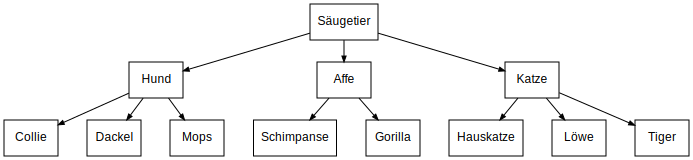

In [49]:
baum_str: str = """
Säugetier
  Hund
    Collie
    Dackel
    Mops
  Affe
    Schimpanse
    Gorilla
  Katze
    Hauskatze
    Löwe
    Tiger
"""

baum = allgemeiner_baum_aus_str(baum_str)
attrs = dict(
    graph_attrs=dict(rankdir="TB", size="10,10"),
    node_attrs=dict(shape="rectangle", style="filled", fillcolor="white", fontname="Helvetica", fontsize="12"),
    edge_attrs=dict(arrowsize="0.6")
)
graph_anzeigen(baum, output_file="images/allgemeiner_baum", **attrs)

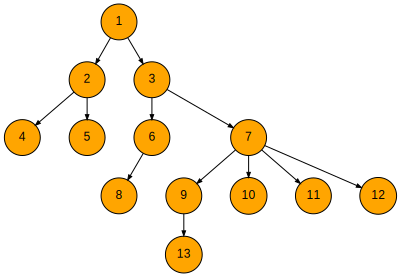

In [50]:
# Baum mit Zahlen, aber manche Knoten haben 0, 1, 2 oder 3 Kinder
zahlen_str2 = """
1
  2
    4
    5
  3
    6
      8
    7
      9
        13
      10
      11
      12
"""

attrs = dict(node_attrs=dict(fillcolor="orange1", fontsize="12"))
graph_anzeigen(allgemeiner_baum_aus_str(zahlen_str2), output_file="images/zahlen_aufgabe_begriffe", **attrs)

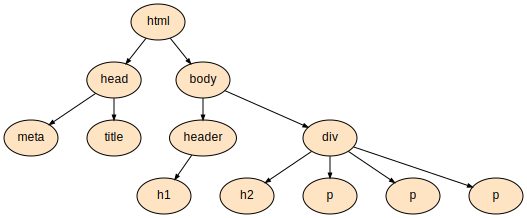

In [51]:
# Die folgende HTML-Struktur soll als Baum visualisiert werden:

# <html>
# <head>
#     <meta charset="UTF-8">
#     <title>ChatGPT</title>
# </head>
# <body>
#     <header>
#         <h1>ChatGPT - Die Zukunft der Kommunikation</h1>
#     </header>
#     <div class="container">
#         <h2>Willkommen zur ChatGPT-Revolution</h2>
#         <p>
#             ChatGPT ist eine bahnbrechende KI-Technologie, die natuerliche menschliche Kommunikation ermoeglicht. Egal, ob Sie Fragen beantworten moechten, Texte generieren oder Unterhaltungen fuehren - ChatGPT steht Ihnen zur Verfuegung.
#         </p>
#         <p>
#             Diese HTML-Seite dient nur zur Veranschaulichung des Themas ChatGPT. Sie koennen ChatGPT in verschiedenen Anwendungen wie Chatbots, Kundenbetreuung und mehr verwenden.
#         </p>
#         <p>
#             Die Zukunft der Kommunikation ist hier, und ChatGPT ist ein wichtiger Teil davon!
#         </p>
#     </div>
# </body>
# </html>

# Baum mit HTML-Struktur
html_str = """
html
    head
        meta
        title
    body
        header
            h1
        div
            h2
            p
            p
            p
"""

attrs = dict(
    node_attrs=dict(shape="ellipse", style="filled", fillcolor="bisque", fontname="Helvetica", fontsize="12"),
)

graph_anzeigen(allgemeiner_baum_aus_str(html_str), output_file="images/html_baum", **attrs)

## Grafiken für Aufgaben zur Klausurvorbereitung

Initalisiere Zufallsgenerator mit seed = 40


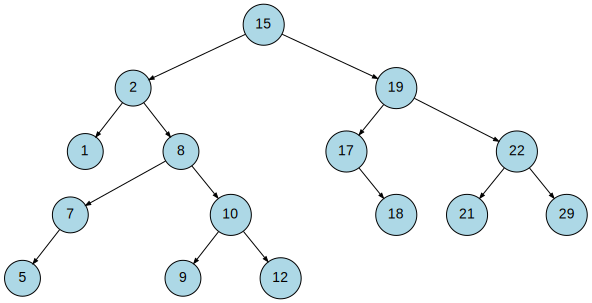

In [52]:
# Wenn Sie die Zufallszahlen reproduzierbar machen wollen, setzen Sie hier einen seed-Wert.
# Falls Sie bei jedem Aufruf dieser Zelle unterschiedliche Zufallszahlen haben wollen, setzen Sie seed auf None.
seed = 40  # 37 40 41 53 64

 # None, wenn Sie unterschiedliche Zufallszahlen wollen
if seed is None:
    seed = random.randint(0, 1000000)
print("Initalisiere Zufallsgenerator mit seed =", seed)  # Damit Sie den seed-Wert sehen können
random.seed(seed)

# Wir erzeugen 15 unterschiedliche Zufallszahlen
zahlen = random.sample(range(1, 30), 15)
# und fügen sie in einen binären Suchbaum ein
baum = BinärerSuchbaum()
for z in zahlen:
    baum.einfuegen(z)

# Wir erzeugen eine Visualisierung des Baums
graph_anzeigen(baum, output_file=f"images/aufgabe_binbaum_suchbaum_seed{seed}")

In [53]:
def anzahl_knoten(baum: Binärbaum) -> int:
    def anzahl_knoten_hilf(k: BKnoten|None) -> int:
        if k is None:
            return 0
        return 1 + anzahl_knoten_hilf(k.linker_teilbaum) + anzahl_knoten_hilf(k.rechter_teilbaum)
    return anzahl_knoten_hilf(baum.wurzel)

def anzahl_blätter(baum: Binärbaum) -> int:
    def anzahl_blätter_hilf(k: BKnoten|None) -> int:
        if k is None:
            return 0
        if k.linker_teilbaum is None and k.rechter_teilbaum is None:
            return 1
        return anzahl_blätter_hilf(k.linker_teilbaum) + anzahl_blätter_hilf(k.rechter_teilbaum)
    return anzahl_blätter_hilf(baum.wurzel)

def tiefe(baum: Binärbaum) -> int:
    def tiefe_hilf(k: BKnoten|None) -> int:
        if k is None:
            return -1
        return 1 + max(tiefe_hilf(k.linker_teilbaum), tiefe_hilf(k.rechter_teilbaum))
    return tiefe_hilf(baum.wurzel)

print(f"Anzahl Knoten: {anzahl_knoten(baum)}")
print(f"Anzahl Blätter: {anzahl_blätter(baum)}")
print(f"Tiefe: {tiefe(baum)}")

# Wie viele Knoten befinden sich im rechten Teilbaum des linken Teilbaums der Wurzel?
start = baum.wurzel.linker_teilbaum.rechter_teilbaum
print(f"Anzahl Knoten im rechten Teilbaum des linken Teilbaums der Wurzel: {anzahl_knoten(Binärbaum(start))}")

print(f"- Preorder: {pretty(baum.daten_preorder())}")
print(f"- Postorder: {pretty(baum.daten_postorder())}")
print(f"- Inorder:  {pretty(baum.daten_inorder())}")


Anzahl Knoten: 15
Anzahl Blätter: 7
Tiefe: 4
Anzahl Knoten im rechten Teilbaum des linken Teilbaums der Wurzel: 6
- Preorder: 15, 2, 1, 8, 7, 5, 10, 9, 12, 19, 17, 18, 22, 21, 29
- Postorder: 1, 5, 7, 9, 12, 10, 8, 2, 18, 17, 21, 29, 22, 19, 15
- Inorder:  1, 2, 5, 7, 8, 9, 10, 12, 15, 17, 18, 19, 21, 22, 29


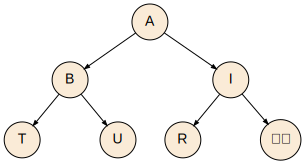

In [54]:
baum = Binärbaum()
wurzel = BKnoten("A")
baum.wurzel = wurzel
wurzel.linker_teilbaum = BKnoten("B")
wurzel.rechter_teilbaum = BKnoten("I")
wurzel.linker_teilbaum.linker_teilbaum = BKnoten("T")
wurzel.linker_teilbaum.rechter_teilbaum = BKnoten("U")
wurzel.rechter_teilbaum.linker_teilbaum = BKnoten("R")
wurzel.rechter_teilbaum.rechter_teilbaum = BKnoten("❤️")

# cremefarbene Knoten
node_attrs = dict(fillcolor="antiquewhite")
graph_anzeigen(baum, output_file="images/baum_abitur", node_attrs=node_attrs)


```python
# Eher unleserliche Variante der Lösung:
baum = Binärbaum()
wurzel = Knoten("A")
baum.wurzel = wurzel

wurzel.setzeLinkenTeilbaum(Knoten("B"))
wurzel.setzeRechtenTeilbaum(Knoten("I"))

wurzel.gibLinkenTeilbaum().setzeLinkenTeilbaum(Knoten("T"))
wurzel.gibLinkenTeilbaum().setzeRechtenTeilbaum(Knoten("U"))

wurzel.gibRechtenTeilbaum().setzeLinkenTeilbaum(Knoten("R"))
wurzel.gibRechtenTeilbaum().setzeRechtenTeilbaum(Knoten("❤️"))

# Schöner ist es so: 
# Knoten erstellen
knoten_a = Knoten("A")
knoten_b = Knoten("B")
knoten_i = Knoten("I")
knoten_t = Knoten("T")
knoten_u = Knoten("U")
knoten_r = Knoten("R")
knoten_herz = Knoten("❤️")

# Baumstruktur festlegen
baum = Binärbaum()
baum.wurzel = knoten_a

# Ebene 1
knoten_a.setzeLinkenTeilbaum(knoten_b)
knoten_a.setzeRechtenTeilbaum(knoten_i)

# Ebene 2
knoten_b.setzeLinkenTeilbaum(knoten_t)
knoten_b.setzeRechtenTeilbaum(knoten_u)
knoten_i.setzeLinkenTeilbaum(knoten_r)
knoten_i.setzeRechtenTeilbaum(knoten_herz)
```


Initalisiere Zufallsgenerator mit seed = 310347


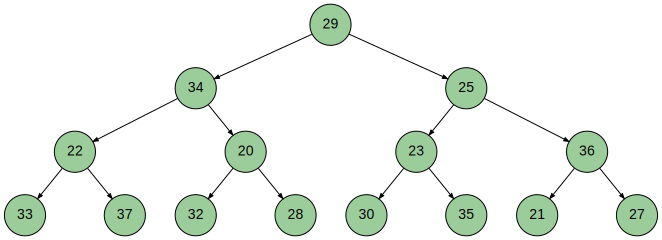

In [97]:
# Wenn Sie die Zufallszahlen reproduzierbar machen wollen, setzen Sie hier einen seed-Wert.
# Falls Sie bei jedem Aufruf dieser Zelle unterschiedliche Zufallszahlen haben wollen, setzen Sie seed auf None.
seed = 310347 # None # 6 # 37 40 41 53 64

 # None, wenn Sie unterschiedliche Zufallszahlen wollen
if seed is None:
    seed = random.randint(0, 1000000)
print("Initalisiere Zufallsgenerator mit seed =", seed)  # Damit Sie den seed-Wert sehen können
random.seed(seed)

# Wir erzeugen n unterschiedliche Zufallszahlen
n = 15
zahlen = random.sample(range(20, 40), n)
# und fügen sie in dieser Reihenfolge in einen binären Baum (nicht Suchbaum) ein, und zwar in level order
baum = Binärbaum()
baum.wurzel = BKnoten(zahlen.pop(0))
queue = [baum.wurzel]
while zahlen:
    k = queue.pop(0)
    if zahlen:
        k.linker_teilbaum = BKnoten(zahlen.pop(0))
        queue.append(k.linker_teilbaum)
    if zahlen:
        k.rechter_teilbaum = BKnoten(zahlen.pop(0))
        queue.append(k.rechter_teilbaum)  

# Wir erzeugen eine Visualisierung des Baums
graph_anzeigen(baum, output_file=f"images/aufgabe_rekursion_verstehen_seed{seed}", node_attrs=dict(fillcolor="darkseagreen3"))

In [101]:
def min_wert(baum: Binärbaum) -> int:
    
    def geheimfunktion(k: BKnoten|None) -> int:
        if k is None:
            return 999999999
        tmp1 = geheimfunktion(k.linker_teilbaum)
        tmp2 = geheimfunktion(k.rechter_teilbaum)
        tmp3 = k.inhalt
        ergebnis = tmp1
        if tmp2 < ergebnis:
            ergebnis = tmp2
        if tmp3 < ergebnis:
            ergebnis = tmp3
        return ergebnis
    
    return geheimfunktion(baum.wurzel)

print(f"Minimaler Wert: {min_wert(baum)}")

Minimaler Wert: 20


In [109]:
# Berechne die Summe aller Werte im Baum
def summe_baum(baum: Binärbaum) -> int:    
    return summe(baum.wurzel)

def summe(knoten: BKnoten|None) -> int:
    """gibt die Summe aller Werte im Baum mit der Wurzel knoten zurück"""
    if knoten is None:
        return 0
    return knoten.inhalt + summe(knoten.linker_teilbaum) + summe(knoten.rechter_teilbaum)
    

print(f"Summe aller Werte: {summe_baum(baum)}")

Summe aller Werte: 432
